#### Canais 9 e 10 dos indivíduos 6 e 7 do DB3 sem dados

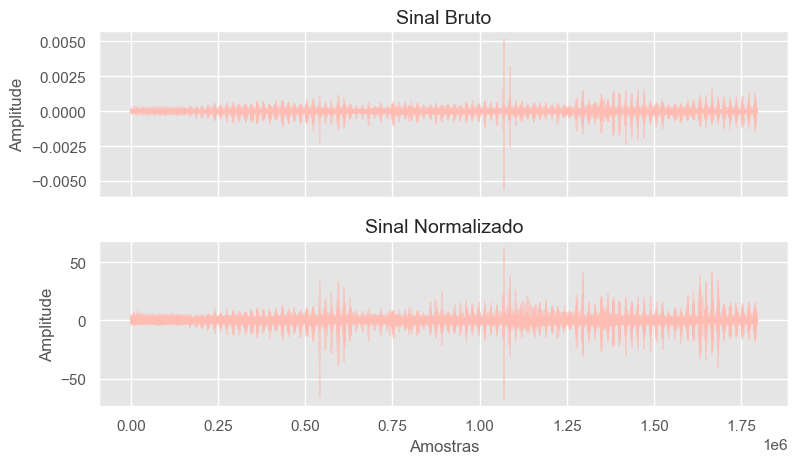

In [69]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import NinaPro_Utility as nf

# Configurações
diretorio = r"D:\Stash\Datasets\DB2"
arquivo = "S3_E1_A1.mat"  # Ajuste para o arquivo do indivíduo desejado
repeticoes_treino = [1, 3, 4, 6]

# Configurar estilo visual moderno
plt.style.use('ggplot')  # Escolha o estilo desejado: 'seaborn-dark', 'fivethirtyeight', 'bmh', etc.
#sns.set(style="darkgrid")  # Outra opção usando seaborn
plt.rcParams.update({'font.size': 10, 'axes.titlesize': 14, 'axes.labelsize': 12})

# Carregar dados originais (sinal bruto)
data_bruto = nf.get_data(diretorio, arquivo)

# Aplicar normalização
data_normalizado = nf.normalise(data_bruto, repeticoes_treino)

# Número de canais
num_canais = 12
cor_unica = '#FFBCB3'

# Criar figura com dois subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

for canal in range(num_canais):
    axs[0].plot(data_bruto.iloc[:, canal].values, alpha=0.6, linewidth=1, color=cor_unica)
axs[0].set_title("Sinal Bruto")
axs[0].set_ylabel("Amplitude")
#axs[0].set_xlim([0,20])


for canal in range(num_canais):
    axs[1].plot(data_normalizado.iloc[:, canal].values, alpha=0.6, linewidth=1, color=cor_unica)
axs[1].set_title("Sinal Normalizado")
axs[1].set_xlabel("Amostras")
axs[1].set_ylabel("Amplitude")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('sinal_comparacao.pdf', format='pdf', bbox_inches='tight')
plt.show()


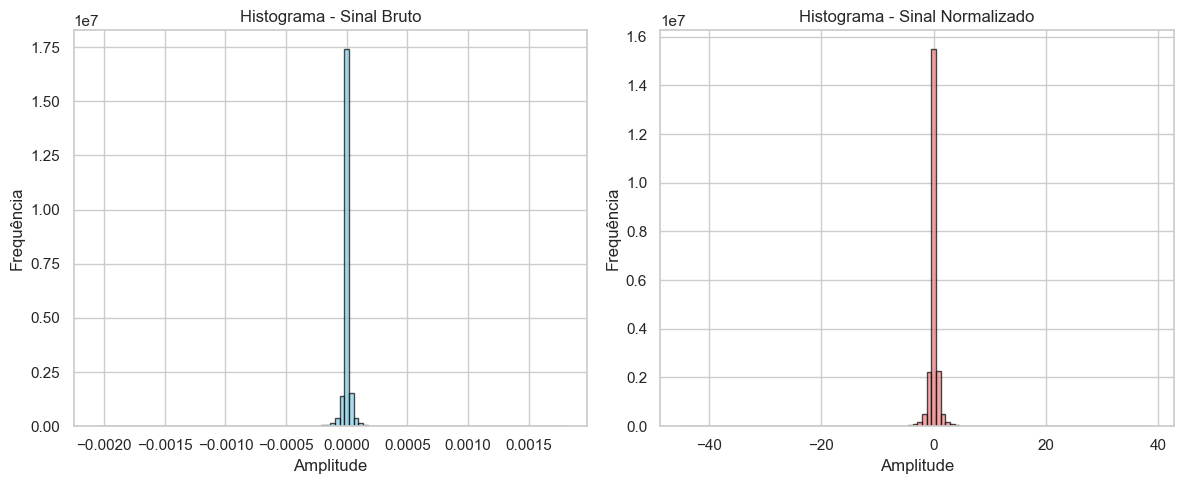

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import NinaPro_Utility as nf

# Configurações
diretorio = r"D:\Stash\Datasets\DB2"
arquivo = "S2_E1_A1.mat"  # Ajuste para o arquivo do indivíduo desejado
repeticoes_treino = [1, 3, 4, 6]

# Carregar dados
data_bruto = nf.get_data(diretorio, arquivo)
data_normalizado = nf.normalise(data_bruto, repeticoes_treino)

# Concatenar todos os canais
sinal_bruto_todos = data_bruto.iloc[:, :12].values.flatten()
sinal_normalizado_todos = data_normalizado.iloc[:, :12].values.flatten()

# Configurar estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# Histograma do sinal bruto
plt.subplot(1, 2, 1)
plt.hist(sinal_bruto_todos, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histograma - Sinal Bruto")
plt.xlabel("Amplitude")
plt.ylabel("Frequência")

# Histograma do sinal normalizado
plt.subplot(1, 2, 2)
plt.hist(sinal_normalizado_todos, bins=100, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title("Histograma - Sinal Normalizado")
plt.xlabel("Amplitude")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


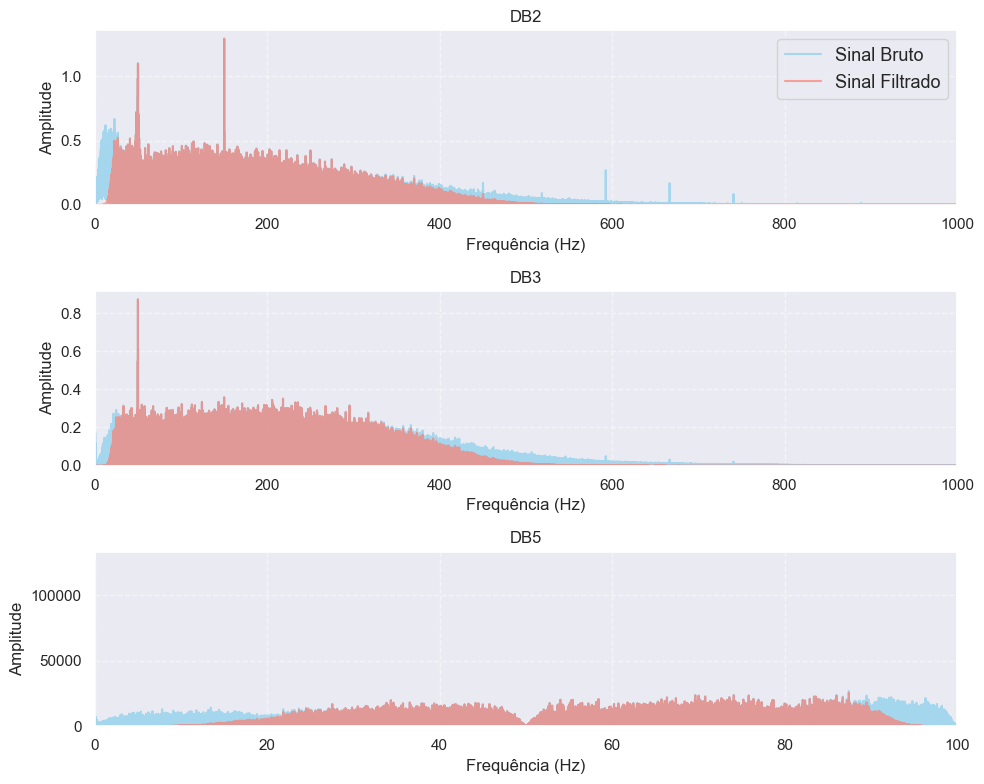

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import NinaPro_Utility as nf
import NinaPro_Utility_db5 as nf5

# Configurar estilo
#sns.set(style="darkgrid")

# Configurações
canal = 0
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Função auxiliar para plotar em um eixo específico
def plot_espectro(ax, diretorio, arquivo, nf_modulo, taxa_amostragem, f_corte, titulo, legenda=False):
    data_bruto = nf_modulo.get_data(diretorio, arquivo)
    data_filtrado = nf_modulo.filter_data(data=data_bruto, f=f_corte, butterworth_order=4, btype='bandpass')

    # Garantir mesmo comprimento
    sinal_bruto = data_bruto.iloc[:, canal].values
    sinal_filtrado = data_filtrado.iloc[:, canal].values
    comprimento_min = min(len(sinal_bruto), len(sinal_filtrado))
    sinal_bruto = sinal_bruto[:comprimento_min]
    sinal_filtrado = sinal_filtrado[:comprimento_min]

    # FFT
    n = len(sinal_bruto)
    freqs = np.fft.rfftfreq(n, d=1/taxa_amostragem)
    fft_bruto = np.abs(np.fft.rfft(sinal_bruto))
    fft_filtrado = np.abs(np.fft.rfft(sinal_filtrado))

    # Plot
    ax.plot(freqs, fft_bruto, label='Sinal Bruto', color='skyblue', alpha=0.7)
    ax.plot(freqs, fft_filtrado, label='Sinal Filtrado', color='salmon', alpha=0.7)
    ax.set_title(titulo)
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Amplitude")
    ax.set_xlim(0, taxa_amostragem / 2)
    ax.set_ylim(bottom=0)
    ax.grid(True, linestyle='--', alpha=0.5)
    if legenda:
        ax.legend(fontsize=13)

# DB2
plot_espectro(
    ax=axs[0],
    diretorio=r"D:\Stash\Datasets\DB2",
    arquivo="S3_E1_A1.mat",
    nf_modulo=nf,
    taxa_amostragem=2000,
    f_corte=(20, 450),
    titulo="DB2",
    legenda=True
)

# DB3
plot_espectro(
    ax=axs[1],
    diretorio=r"D:\Stash\Datasets\DB3\ex2",
    arquivo="S3_E2_A1.mat",
    nf_modulo=nf,
    taxa_amostragem=2000,
    f_corte=(20, 450),
    titulo="DB3"
)

# DB5
plot_espectro(
    ax=axs[2],
    diretorio=r"D:\Stash\Datasets\DB5",
    arquivo="S3_E1_A1.mat",
    nf_modulo=nf5,
    taxa_amostragem=200,
    f_corte=(20, 90),
    titulo="DB5"
)

# Ajuste final
plt.tight_layout()
plt.savefig("espectros_subfigura_horizontal.pdf", format="pdf", bbox_inches="tight")
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_26660\2188331898.py:78: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_26660\2188331898.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("emg_plot_larger_font.png")


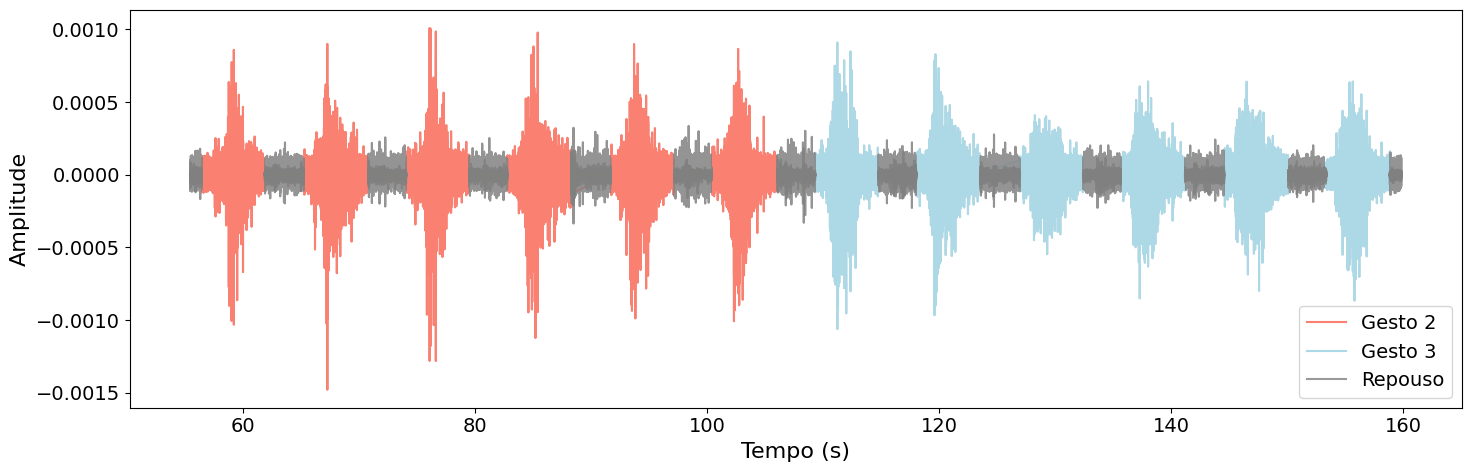

In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from itertools import groupby
from operator import itemgetter


subject_path = r"D:\Stash\Datasets\DB2\S6_E1_A1.mat"

data = scipy.io.loadmat(subject_path)
emg = data['emg']
stimulus = data['stimulus'].squeeze()


fs = 2000  


gesture_labels = [2, 3]
margin = 2000

indices = np.where(np.isin(stimulus, gesture_labels))[0]

if len(indices) > 0:
    start_idx = indices[0]
    end_idx = indices[-1]

    window_start = max(start_idx - margin, 0)
    window_end = min(end_idx + margin, len(stimulus))

    emg_segment = emg[window_start:window_end, :]
    stimulus_segment = stimulus[window_start:window_end]
    time_axis = np.arange(window_start, window_end) / fs

    
    plt.rcParams.update({'font.size': 16})

    plt.figure(figsize=(15, 5))

    
    for channel in range(emg.shape[1]):
        plt.plot(time_axis, emg_segment[:, channel], color='gray', alpha=0.2)

    
    colors = ['salmon', 'lightblue']
    labels = ['Gesto 2', 'Gesto 3']

    
    for i, gesture_label in enumerate(gesture_labels):
        highlight_mask = stimulus_segment == gesture_label
        highlight_indices = np.where(highlight_mask)[0]
        if len(highlight_indices) > 0:
            for channel in range(emg.shape[1]):
                plt.plot(time_axis[highlight_indices],
                         emg_segment[highlight_indices, channel],
                         color=colors[i], alpha=1,
                         label=labels[i] if channel == 0 else None)

   
    rest_indices = np.where(stimulus_segment == 0)[0]
    if len(rest_indices) > 0:
        rest_groups = []
        for k, g in groupby(enumerate(rest_indices), lambda ix: ix[0] - ix[1]):
            group = list(map(itemgetter(1), g))
            rest_groups.append(group)

        for group in rest_groups:
            for channel in range(emg_segment.shape[1]):
                plt.plot(time_axis[group], emg_segment[group, channel],
                         color='gray', alpha=0.8,
                         label='Repouso' if channel == 0 and group == rest_groups[0] else None)

   
    plt.xlabel("Tempo (s)", fontsize=16)
    plt.ylabel("Amplitude", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()

    
    plt.savefig("emg_plot_larger_font.pdf")
    plt.savefig("emg_plot_larger_font.png")
    plt.show()

else:
    print(f"None of the gestures {gesture_labels} found in the signal.")


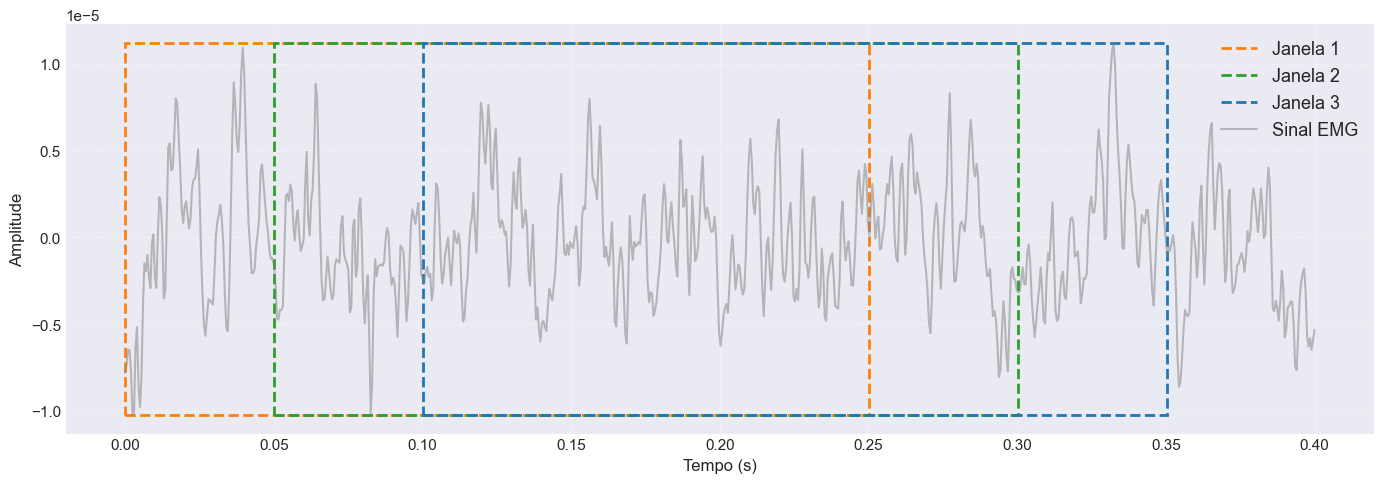

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch
import NinaPro_Utility as nf

# Configurações do diretório e arquivo real
diretorio = r"D:\Stash\Datasets\DB3\ex2"
arquivo = "S3_E2_A1.mat"

# Carregar o sinal real
data = nf.get_data(diretorio, arquivo)
emg_signal = data.iloc[:, 0].values

# Parâmetros
taxa_amostragem = 2000
tamanho_janela = 500      # 250 ms
passo_janela = 100        # 50 ms
duracao_trecho = 0.4      # segundos

# Selecionar um trecho do sinal real
start_idx = 0
end_idx = int(start_idx + taxa_amostragem * duracao_trecho)
tempo = np.linspace(0, duracao_trecho, end_idx - start_idx)
sinal_trecho = emg_signal[start_idx:end_idx]

# Cálculo de durações
dur_janela = tamanho_janela / taxa_amostragem
dur_overlap = tamanho_janela / taxa_amostragem - passo_janela / taxa_amostragem

# Configurar o gráfico com estilo moderno
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(14, 5))
plt.plot(tempo, sinal_trecho, color='gray', alpha=0.5, linewidth=1.5, label='Sinal EMG Real')

# Definição de cores e altura do retângulo
cores = ['#FF7F0E', '#2CA02C', '#1F77B4']
altura = max(sinal_trecho) - min(sinal_trecho)
ymin = min(sinal_trecho)

# Adicionar janelas como retângulos com contorno pontilhado
for i in range(3):
    start_j = i * passo_janela
    end_j = start_j + tamanho_janela
    if end_j > len(sinal_trecho):
        break
    x_inicio = tempo[start_j]
    largura = tempo[end_j] - tempo[start_j]
    rect = Rectangle((x_inicio, ymin), largura, altura, linewidth=2,
                     edgecolor=cores[i], facecolor='none', linestyle='--')
    plt.gca().add_patch(rect)



# Melhorar visual e legendas simples (linhas)
custom_lines = [plt.Line2D([0], [0], color=cores[0], linestyle='--', lw=2),
                plt.Line2D([0], [0], color=cores[1], linestyle='--', lw=2),
                plt.Line2D([0], [0], color=cores[2], linestyle='--', lw=2),
                plt.Line2D([0], [0], color='gray', lw=1.5, alpha=0.5)]
plt.legend(custom_lines, ['Janela 1', 'Janela 2', 'Janela 3', 'Sinal EMG'],
           loc='upper right', fontsize=13)

# Eixos e rótulos
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Salvar figura
plt.savefig('janelamento_ilustracao_final.pdf')
plt.savefig('janelamento_ilustracao_final.png', dpi=300)
plt.show()


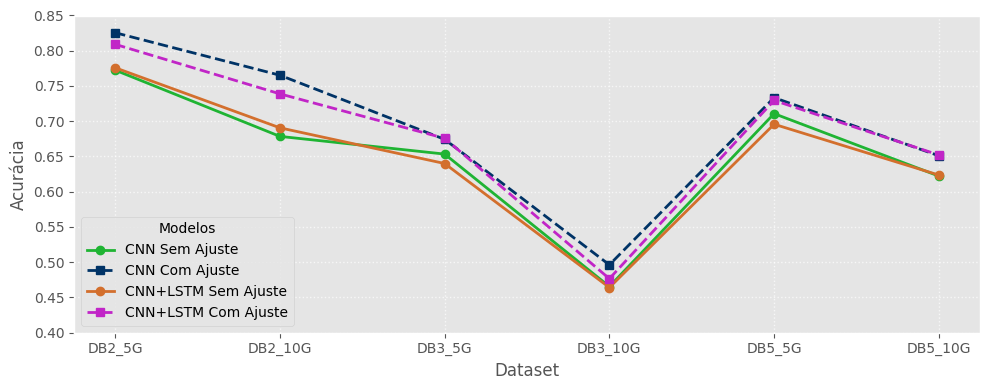

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Dados
datasets = ['DB2_5G', 'DB2_10G', 'DB3_5G', 'DB3_10G', 'DB5_5G', 'DB5_10G']
cnn_sem = [0.7724500643428636, 0.6785127156805284, 0.6534162800506116, 0.46551181102362205, 0.7107797862514844, 0.6222265983983195]
cnn_com = [0.8255748894981256, 0.7652709676497077, 0.6742935470265711, 0.4963254593175853, 0.7334740730967146, 0.6510437179992122]
lstm_sem = [0.77586303362614, 0.6906637313624863, 0.6400253057781526, 0.46409448818897636, 0.6957382240401109, 0.6236707365104371]
lstm_com = [0.8090975214009959, 0.7388389347133075, 0.6757697174188106, 0.47664041994750656, 0.7295157672516163, 0.6521596429040305]

# Preparação
x = np.arange(len(datasets))

# Estilo moderno
plt.style.use('ggplot')
plt.figure(figsize=(10, 4))

# Cores e marcadores
colors = ["#1fb433", '#003366', "#d36f2d", "#C125C7"]
markers = ['o', 's', 'o', 's']

# Plotar todas as linhas
plt.plot(x, cnn_sem, marker=markers[0], linestyle='-', color=colors[0], linewidth=2)
plt.plot(x, cnn_com, marker=markers[1], linestyle='--', color=colors[1], linewidth=2)
plt.plot(x, lstm_sem, marker=markers[2], linestyle='-', color=colors[2], linewidth=2)
plt.plot(x, lstm_com, marker=markers[3], linestyle='--', color=colors[3], linewidth=2)

# Legenda customizada
custom_lines = [
    Line2D([0], [0], color=colors[0], lw=2, marker='o', linestyle='-', label='CNN Sem Ajuste'),
    Line2D([0], [0], color=colors[1], lw=2, marker='s', linestyle='--', label='CNN Com Ajuste'),
    Line2D([0], [0], color=colors[2], lw=2, marker='o', linestyle='-', label='CNN+LSTM Sem Ajuste'),
    Line2D([0], [0], color=colors[3], lw=2, marker='s', linestyle='--', label='CNN+LSTM Com Ajuste'),
]

plt.legend(handles=custom_lines, fontsize=10, title='Modelos')

# Configurações do gráfico
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
#plt.title('Comparação de Acurácia - CNN e CNN+LSTM (Com e Sem Ajuste)', fontsize=14, fontweight='bold')
plt.xticks(x, datasets, rotation=0, fontsize=10)
plt.ylim(0.4, 0.85)
plt.grid(True, linestyle=':', linewidth=1, alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('comparacao_cnn_lstm_acuracia.pdf',format='pdf')
# Exibir o gráfico
plt.show()


In [16]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === Função MPP e MZP ===
def calculate_mpp_mzp(X):
    mpp, mzp = [], []
    for sample in X:
        mu0 = np.sqrt(np.sum(sample ** 2, axis=0))
        delta = np.diff(sample, axis=0)
        mu2 = np.sqrt(np.sum(delta ** 2, axis=0))
        delta2 = np.diff(delta, axis=0)
        mu4 = np.sqrt(np.sum(delta2 ** 2, axis=0))

        psi = np.nan_to_num(mu4 / mu2)
        phi = np.nan_to_num(mu2 / mu0)
        mpp_sample = mu0 * psi
        mzp_sample = mu0 * phi

        mpp.append(mpp_sample)
        mzp.append(mzp_sample)

    return np.stack(mpp), np.stack(mzp)

# === Dicionário com caminhos dos datasets e modelos ===
configurations = [
    {
        "name": "DB2_5G",
        "model_path": r"C:\Users\PC\Desktop\TCC_2025\App\Models\DB3\modelo_hibrido_otimizado_DB2_5G.h5",
        "data_path":  r"D:\Stash\Datasets\db2_janelado\db2_5g_all_data.npz",
        "output_csv": "CNN_db2_5g_predictions.csv"
    },
    {
        "name": "DB2_10G",
        "model_path": r"C:\Users\PC\Desktop\TCC_2025\App\Models\DB3\modelo_hibrido_otimizado_DB2_10G.h5",
        "data_path":  r"D:\Stash\Datasets\db2_janelado\db2_10g_all_data.npz",
        "output_csv": "CNN_db2_10g_predictions.csv"
    },
    {
        "name": "DB3_5G",
        "model_path": r"C:\Users\PC\Desktop\TCC_2025\App\Models\DB3\modelo_hibrido_otimizado_DB3_5G.h5",
        "data_path":  r"D:\Stash\Datasets\db3_janelado\db3_5g_all_data.npz",
        "output_csv": "CNN_db3_5g_predictions.csv"
    },
    {
        "name": "DB3_10G",
        "model_path": r"C:\Users\PC\Desktop\TCC_2025\App\Models\DB3\modelo_hibrido_otimizado_DB3_10G.h5",
        "data_path":  r"D:\Stash\Datasets\db3_janelado\db3_10g_all_data.npz",
        "output_csv": "CNN_db3_10g_predictions.csv"
    },
    {
        "name": "DB5_5G",
        "model_path": r"C:\Users\PC\Desktop\TCC_2025\App\Models\DB3\modelo_hibrido_otimizado_DB5_5G.h5",
        "data_path":  r"D:\Stash\Datasets\db5_janelado\db5_5g_all_data.npz",
        "output_csv": "CNN_db5_5g_predictions.csv"
    },
    {
        "name": "DB5_10G",
        "model_path": r"C:\Users\PC\Desktop\TCC_2025\App\Models\DB3\modelo_hibrido_otimizado_DB5_10G.h5",
        "data_path":  r"D:\Stash\Datasets\db5_janelado\db5_10g_all_data.npz",
        "output_csv": "CNN_db5_10g_predictions.csv"
    }
]

# === Processamento de todos os conjuntos
for cfg in configurations:
    print(f"\n🔹 Processando: {cfg['name']}")

    # Carregar dados
    data = np.load(cfg["data_path"])
    X_test = data["X_test"]
    y_test_raw = data["y_test"]

    # Codificação
    encoder = LabelEncoder()
    encoder.fit(y_test_raw)
    y_test = encoder.transform(y_test_raw)

    # Features
    mpp_test, mzp_test = calculate_mpp_mzp(X_test)
    X_test_features = np.concatenate([mpp_test, mzp_test], axis=-1)[..., np.newaxis]

    # Modelo e predição
    model = load_model(cfg["model_path"])
    y_pred_probs = model.predict(X_test_features, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Decodificação
    y_test_decoded = encoder.inverse_transform(y_test)
    y_pred_decoded = encoder.inverse_transform(y_pred)

    # Salvar CSV
    df = pd.DataFrame({
        "y_true": y_test_decoded,
        "y_pred": y_pred_decoded
    })
    df.to_csv(cfg["output_csv"], index=False)
    print(f"✅ CSV salvo em: {cfg['output_csv']}")

    # Matriz de confusão
    cm = confusion_matrix(y_test_decoded, y_pred_decoded, labels=encoder.classes_)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {cfg['name']}")
    plt.tight_layout()

    # Salvar imagem
    conf_matrix_path = f"{cfg['name'].lower()}_confusion_matrix_hibrido.png"
    plt.savefig(conf_matrix_path, dpi=300)
    plt.close()
    print(f"🖼️ Matriz de confusão salva em: {conf_matrix_path}")



🔹 Processando: DB2_5G


✅ CSV salvo em: CNN_db2_5g_predictions.csv
🖼️ Matriz de confusão salva em: db2_5g_confusion_matrix_hibrido.png

🔹 Processando: DB2_10G


✅ CSV salvo em: CNN_db2_10g_predictions.csv
🖼️ Matriz de confusão salva em: db2_10g_confusion_matrix_hibrido.png

🔹 Processando: DB3_5G


C:\Users\PC\AppData\Local\Temp\ipykernel_25944\4241418945.py:20: RuntimeWarning: invalid value encountered in divide
  psi = np.nan_to_num(mu4 / mu2)
C:\Users\PC\AppData\Local\Temp\ipykernel_25944\4241418945.py:21: RuntimeWarning: invalid value encountered in divide
  phi = np.nan_to_num(mu2 / mu0)


✅ CSV salvo em: CNN_db3_5g_predictions.csv
🖼️ Matriz de confusão salva em: db3_5g_confusion_matrix_hibrido.png

🔹 Processando: DB3_10G


C:\Users\PC\AppData\Local\Temp\ipykernel_25944\4241418945.py:20: RuntimeWarning: invalid value encountered in divide
  psi = np.nan_to_num(mu4 / mu2)
C:\Users\PC\AppData\Local\Temp\ipykernel_25944\4241418945.py:21: RuntimeWarning: invalid value encountered in divide
  phi = np.nan_to_num(mu2 / mu0)


✅ CSV salvo em: CNN_db3_10g_predictions.csv
🖼️ Matriz de confusão salva em: db3_10g_confusion_matrix_hibrido.png

🔹 Processando: DB5_5G


✅ CSV salvo em: CNN_db5_5g_predictions.csv
🖼️ Matriz de confusão salva em: db5_5g_confusion_matrix_hibrido.png

🔹 Processando: DB5_10G


✅ CSV salvo em: CNN_db5_10g_predictions.csv
🖼️ Matriz de confusão salva em: db5_10g_confusion_matrix_hibrido.png


In [15]:
import pandas as pd
import os

# === Lista de arquivos de predição a ordenar ===
prediction_files = [
    "CNN_db2_5g_predictions.csv",
    # "CNN_db3_5g_predictions.csv",
    # "CNN_db5_5g_predictions.csv",
    # "hibrido_db2_5g_predictions.csv",
    # "hibrido_db3_5g_predictions.csv",
    # "hibrido_db5_5g_predictions.csv",

]

# === Função para ordenar e salvar ===
def sort_prediction_file(file_path):
    df = pd.read_csv(file_path)
    
    # Garante que as colunas y_true e y_pred existem
    if "y_true" not in df.columns or "y_pred" not in df.columns:
        print(f"[ERRO] Arquivo {file_path} não possui colunas 'y_true' e 'y_pred'")
        return

    # Ordenar por y_true
    df_sorted = df.sort_values(by="y_true").reset_index(drop=True)

    # Criar nome do novo arquivo
    base_name = os.path.splitext(file_path)[0]
    sorted_file = f"{base_name}_sorted_1.csv"

    # Salvar
    df_sorted.to_csv(sorted_file, index=False)
    print(f"[OK] Arquivo ordenado salvo: {sorted_file}")

# === Aplicar em todos os arquivos
for file in prediction_files:
    sort_prediction_file(file)


[OK] Arquivo ordenado salvo: CNN_db2_5g_predictions_sorted_1.csv


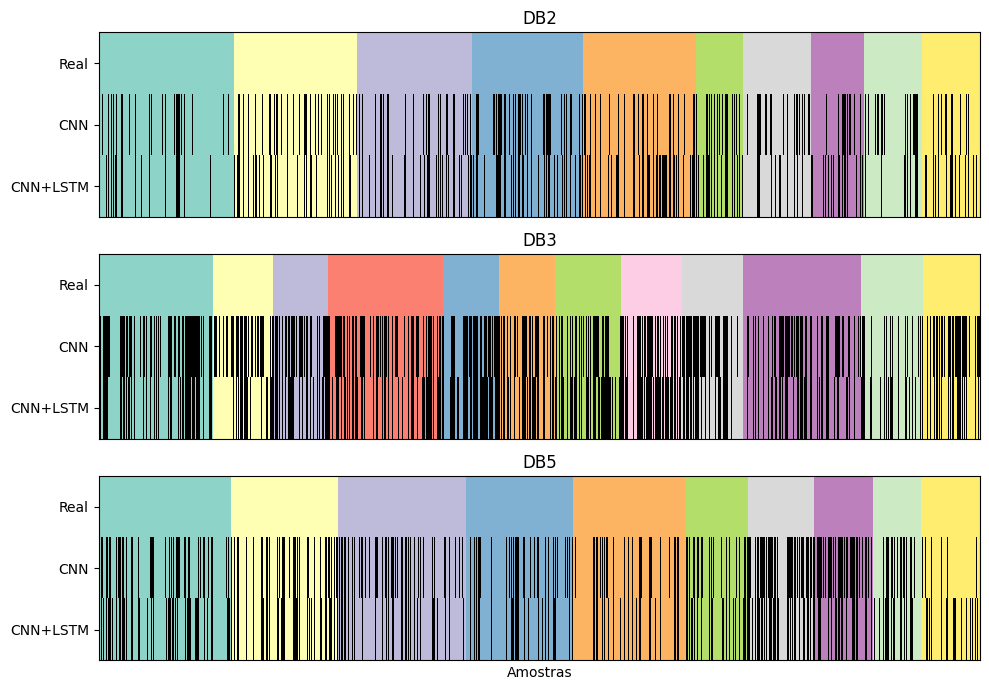

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

# === Função para construir a matriz de cores por modelo ===
def build_visual_matrix(model_files, base_file, title, use_mapping=False):
    df_base = pd.read_csv(base_file)
    y_true = df_base["y_true"].astype(int)

    if use_mapping:
        unique_gestures = sorted(y_true.unique())
        gesture_to_index = {label: idx for idx, label in enumerate(unique_gestures)}
        y_true = y_true.map(gesture_to_index)
        n_classes = len(gesture_to_index)
    else:
        n_classes = len(np.unique(y_true))
        gesture_to_index = None

    min_len = min(len(y_true), *[len(pd.read_csv(f)) for f in model_files.values()])
    y_true_sorted = y_true.values[:min_len]

    cmap_classes = colormaps["Set3"] if n_classes <= 12 else colormaps["tab20"]
    class_rgb = cmap_classes(np.linspace(0, 1, n_classes))

    data_color = []
    labels = []

    # Linha de verdade
    if use_mapping:
        truth_row = class_rgb[y_true_sorted]
    else:
        truth_row = class_rgb[y_true_sorted - 1]

    data_color.append(truth_row)
    labels.append("Real")

    for model_name, file in model_files.items():
        df = pd.read_csv(file)
        y_pred = df["y_pred"].astype(int)
        y_true_model = df["y_true"].astype(int)

        if gesture_to_index:
            y_true_model = y_true_model.map(gesture_to_index)
            y_pred = y_pred.map(gesture_to_index)

        y_pred = y_pred.values[:min_len]
        y_true_model = y_true_model.values[:min_len]

        correct = y_pred == y_true_model
        row = np.zeros((min_len, 4))  # preto
        row[:, 3] = 1

        if gesture_to_index:
            row[correct] = class_rgb[y_true_model[correct]]
        else:
            row[correct] = class_rgb[y_true_model[correct] - 1]

        data_color.append(row)
        labels.append(model_name)

    return np.array(data_color), labels, title


# === Apenas os arquivos dos modelos CNN (híbridos)
model_files_db2 = {
    "CNN": "CNN_db2_5g_predictions_sorted_1.csv",
    "CNN+LSTM":"hibrido_db2_5g_predictions_sorted_1.csv"
    
}

model_files_db3 = {
    "CNN": "CNN_db3_5g_predictions_sorted_1.csv",
    "CNN+LSTM":"hibrido_db3_5g_predictions_sorted_1.csv"
}

model_files_db5 = {
    "CNN": "CNN_db5_5g_predictions_sorted_1.csv",
    "CNN+LSTM":"hibrido_db5_5g_predictions_sorted_1.csv"
}

# === Construir matrizes usando os próprios arquivos como base
matrix_db2, labels_db2, title_db2 = build_visual_matrix(model_files_db2, "CNN_db2_5g_predictions_sorted_1.csv", "DB2", use_mapping=False)
matrix_db3, labels_db3, title_db3 = build_visual_matrix(model_files_db3, "CNN_db3_5g_predictions_sorted_1.csv", "DB3", use_mapping=True)
matrix_db5, labels_db5, title_db5 = build_visual_matrix(model_files_db5, "CNN_db5_5g_predictions_sorted_1.csv", "DB5", use_mapping=True)

# === Plotagem
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 7))

axs[0].imshow(matrix_db2, aspect='auto', interpolation='nearest')
axs[0].set_yticks(np.arange(len(labels_db2)))
axs[0].set_yticklabels(labels_db2)
axs[0].set_xticks([])
axs[0].set_title(title_db2)

axs[1].imshow(matrix_db3, aspect='auto', interpolation='nearest')
axs[1].set_yticks(np.arange(len(labels_db3)))
axs[1].set_yticklabels(labels_db3)
axs[1].set_xticks([])
axs[1].set_title(title_db3)

axs[2].imshow(matrix_db5, aspect='auto', interpolation='nearest')
axs[2].set_yticks(np.arange(len(labels_db5)))
axs[2].set_yticklabels(labels_db5)
axs[2].set_xticks([])
axs[2].set_title(title_db5)
axs[2].set_xlabel("Amostras")

plt.tight_layout()
plt.savefig("heatmap_cnn.png", dpi=300, bbox_inches='tight')
plt.savefig("heatmap_cnn.pdf", dpi=300, bbox_inches='tight')
plt.show()
